In [1]:
import sys
import json
import importlib
import gc
import shutil

from utils.nontf_util import *
from utils.tf_util import *
import dataset_loader


# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

# os.chdir(os.path.split(__file__)[0])



Start testing for dataset {}.


Model dict faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28
/Users/saravana/.keras/datasets/faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28/saved_model
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Model faster_rcnn loaded, start testing.
['/Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011', '/Users/saravana/.pyenv/versions/3.6.5/lib/python36.zip', '/Users/saravana/.pyenv/versions/3.6.5/lib/python3.6', '/Users/saravana/.pyenv/versions/3.6.5/lib/python3.6/lib-dynload', '', '/Users/saravana/.pyenv/versions/3.6.5/lib/python3.6/site-packages', '/Users/saravana/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/extensions', '/Users/saravana/.ipython']
/Users/saravana/Documents/Work/Projects/Bird_Detection/_bird_detector_output/faster_rcnn/CalTechCUB.json
Start testing for dataset CalTechCUB.

No previous status to return to
The progress is is 0█--------------------------------------------------------------------------------

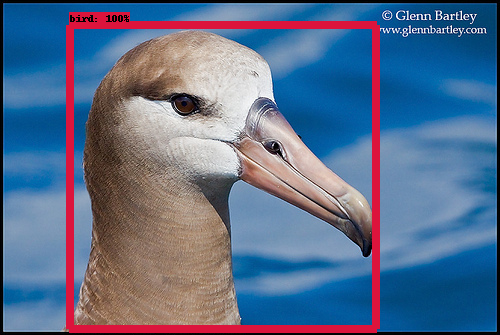

The progress is is 0██████████████████-------------------------------------------------------------------| 33.3% 
The absolute path is /Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg
Try block--=====
Value 1 is 0.2879350483417511
Value 2 is 500.0
{'inf_time': 9.124698162078857, 'num_detections': 1, 'bounding_boxes': [{'class_id': 16, 'x': 143, 'y': 41, 'width': 148, 'height': 391, 'score': 0.9985864162445068}]}


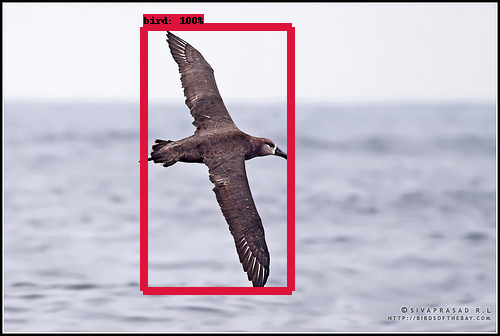

The progress is is 0███████████████████████████████████--------------------------------------------------| 50.0% 
The absolute path is /Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
Try block--=====
Value 1 is 0.032728251069784164
Value 2 is 500.0
{'inf_time': 8.41794204711914, 'num_detections': 1, 'bounding_boxes': [{'class_id': 16, 'x': 16, 'y': 168, 'width': 391, 'height': 277, 'score': 0.9998763799667358}]}


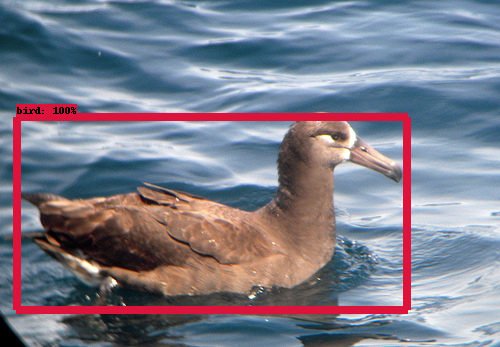

The progress is is 0███████████████████████████████████████████████████----------------------------------| 66.7% 
The absolute path is /Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg
Try block--=====
Value 1 is 0.2711722254753113
Value 2 is 415.0
{'inf_time': 8.170058965682983, 'num_detections': 1, 'bounding_boxes': [{'class_id': 16, 'x': 112, 'y': 51, 'width': 253, 'height': 248, 'score': 0.9996572732925415}]}


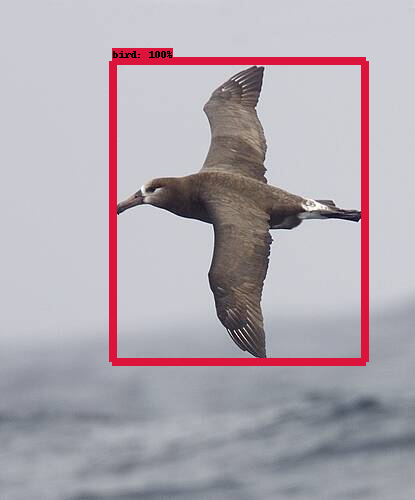

The progress is is 0████████████████████████████████████████████████████████████████████-----------------| 83.3% 
The absolute path is /Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg
Try block--=====
Value 1 is 0.22859950363636017
Value 2 is 331.0
Value 1 is 0.20045310258865356
Value 2 is 331.0
{'inf_time': 7.779471158981323, 'num_detections': 2, 'bounding_boxes': [{'class_id': 16, 'x': 75, 'y': 47, 'width': 123, 'height': 264, 'score': 0.7305764555931091}, {'class_id': 1, 'x': 66, 'y': 42, 'width': 136, 'height': 266, 'score': 0.45374393463134766}]}


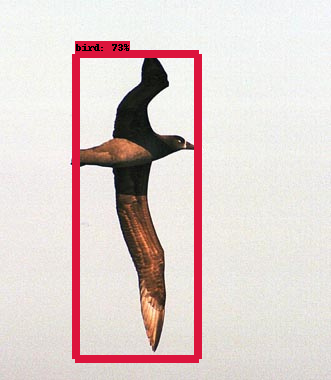

6/6 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
The progress is is 0
The absolute path is /Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg
Try block--=====
Value 1 is 0.07180417329072952
Value 2 is 500.0
{'inf_time': 7.608484268188477, 'num_detections': 1, 'bounding_boxes': [{'class_id': 16, 'x': 35, 'y': 51, 'width': 248, 'height': 426, 'score': 0.9994937181472778}]}


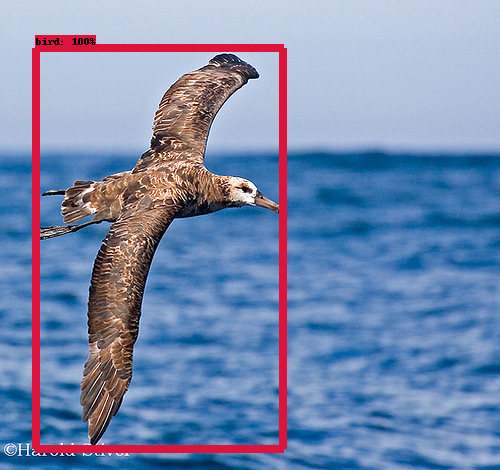

done


In [2]:
with open("config.json") as config_file:
    config = json.load(config_file)
    for model_dict in config['object_detectors']:
        if not model_dict['active']:
            continue
        print("Model dict {}".format(model_dict['name']))
        detection_model = load_model(model_dict['name'])
        print("Model {} loaded, start testing.".format(model_dict['abr']))
        for dataset in config['datasets']:
            if not dataset['active']:
                continue
            dataset_path = os.path.normpath(dataset['path'])
            out_dir = os.path.join(os.path.join(
                os.path.normpath(config['output_dir']),
                model_dict['abr']))
            if not os.path.exists(out_dir):
                os.makedirs(out_dir)

            file_name = dataset['short_name'] + ".json"
            out_path = os.path.join(out_dir, file_name)
            if not sys.path[0] == dataset_path:
                sys.path.insert(0, dataset_path)

            print(sys.path)
            print(out_path)
            
#             dataloader = load_pascal_voc(dataset_path,dataset,model_dict)
            dataloader = load_caltech_cub(dataset_path,dataset,model_dict)
            cur_dataset = dataloader['dataset']
            
            print("Start testing for dataset {}.".format(dataset['short_name']))
            dataset_length = len(cur_dataset['images'])
            print()
            progress, cur_dataset = checkprogress(out_path, cur_dataset)
            for i, image in enumerate(cur_dataset['images']):
                print_progress_bar(i + 1, dataset_length, prefix="{}/{}".format(i + 1, dataset_length))
                print("The progress is is {}".format(progress))
                if progress > i:
                    continue
                abspath = os.path.join(dataset_path, image['path'])
                
                print("The absolute path is {}".format(abspath))
        
#                 output = run_inference(detection_model, abspath)
#                 fasd = output['detection_boxes'][0][0]
#                 afdsfs = output['detection_boxes'][0][1] 
#                 print("fasdfsd is {}".format(fasd))
#                 print("fds is {}".format(afdsfs))
                
#                 print("Image width is {}".format(float(image['width'])))
                
#                 widdsh = fasd * float(image['width'])
#                 heighsdt = afdsfs * float(image['height'])
                
#                 print("Width is {}".format(widdsh))
#                 print("Height is {}".format(heighsdt))
            
#                 image['output'] = output_to_abs(image, output)
#                 print("=============")
#                 print(image['output'])
                
                try:
                    print("Try block--=====")
                    output = run_inference(detection_model, abspath)
                    image['output'] = output_to_abs(image, output)
                    print("=============")
                    print(image['output'])
                    show_inference(detection_model, abspath)
                except:
                    print("The exception is {}".format(e))
                    print("Problem with image_data {} from dataset {}".format(image['path'], dataset['short_name']))
                    
                dataset['progress'] = [i + 1, dataset_length]
                dump_output(config['output_dir'], model_dict, dataset, cur_dataset)
            del cur_dataset
        tf.keras.backend.clear_session()
        gc.collect()
        del detection_model
print("done")

In [ ]:
trainval_annotations = os.path.join(dataset_path,"trainval/Annotations")
print(len(os.listdir(trainval_annotations)))
trainval_images = os.path.join(dataset_path,"trainval/JPEGImages")
print(len(os.listdir(trainval_images)))
images = os.path.join(dataset_path,"Annotations")
annotations = os.path.join(dataset_path,"JPEGImages")
print(len(os.listdir(images)))
print(len(os.listdir(annotations)))
print(dataset_path)
print(len(os.listdir("/Volumes/My-Passport/Dataset/VOCdevkit/VOC2012/Annotations")))

In [ ]:
print(dataset_path)
trainval_jpeg = os.path.join(dataset_path,"trainval/JPEGImages")
trainval_annotations = os.path.join(dataset_path,"trainval/Annotations")

trainval_data = []
with open(trainval_path) as f:
    trainval_data = [line.split(None, 1)[0] for line in f]

if not os.path.exists(trainval_jpeg) and not os.path.exists(trainval_annotations):
    os.makedirs(trainval_jpeg)
    os.makedirs(trainval_annotations)
    
if len(os.listdir(trainval_jpeg)) == 0 and len(os.listdir(trainval_annotations)) == 0:
    jpegs = os.path.join(dataset_path,"JPEGImages")
    annotations = os.path.join(dataset_path,"Annotations")
    trainval_path = os.path.join(dataset_path,"ImageSets/Layout/trainval.txt")
    img_annotations = os.listdir(annotations)
    
    for i,each in enumerate(os.listdir(jpegs)):
        print(i)
        filename_no_ext = ".".join(each.split(".")[:-1])
        for item in trainval_data:
            if item == filename_no_ext:
                src_jpeg_path = os.path.join(jpegs,each)
                src_annotation_path = os.path.join(annotations,img_annotations[i])
                dst_jpeg_path = os.path.join(trainval_jpeg,each)
                dst_annotation_path = os.path.join(trainval_annotations,img_annotations[i])
                
                shutil.copyfile(src_jpeg_path, dst_jpeg_path)
                shutil.copyfile(src_annotation_path, dst_annotation_path)
                print(item)
        
print(len(trainval_data))
print("Training Jpeg")
print(len(os.listdir(trainval_jpeg)))
print("Training Annotations")
print(len(os.listdir(trainval_annotations)))



In [ ]:
from PIL import Image

data_set_path = "/Volumes/My-Passport/Dataset/CUB_200_2011/CUB_200_2011"
images_text_path = os.path.join(data_set_path,"images.txt")

data = {}

dataset_obj = {}
dataset_obj['initialized'] = True
dataset_obj['classes'] = ["person", "bird", "cat", "cow", "dog", "horse", "sheep", "aeroplane", "bicycle", "boat", "bus", "car", "motorbike", "train", "bottle", "chair", "dining table", "potted plant", "sofa", "tv/monitor"]

images = []

bounding_box_path = os.path.join(data_set_path,"bounding_boxes.txt")
with open(bounding_box_path) as bb_path:
    bb_lines = bb_path.readlines()
    bb_columns = []

    for bb_line in bb_lines:
        bb_line = bb_line.strip()
        bb_array = [bb_item.strip() for bb_item in bb_line.split(' ')]
        bb_columns.append(bb_array)
    

with open(images_text_path) as f:
    lines = f.readlines()
    columns = [] # To store column names

    i = 1
    for line in lines:
        line = line.strip() # remove leading/trailing white spaces
        image_list_array = [item.strip() for item in line.split(' ')]
        columns.append(image_list_array)
    
    for index,item in enumerate(columns):
        coco_image_path = item[1]
        image_obj = {}
        image_obj['path'] = "images/"+coco_image_path
        
        image = Image.open(os.path.join(data_set_path,image_obj['path']))
        width, height = image.size
        image_obj['width'] = float(width)
        image_obj['height'] = float(width)

        
        bounding_boxes = []
        if item[0] == bb_columns[index][0]:
            bounding_box_obj = {}
            bounding_box_obj['x'] = bb_columns[index][1]
            bounding_box_obj['y'] = bb_columns[index][2]
            bounding_box_obj['width'] = bb_columns[index][3]
            bounding_box_obj['height'] = bb_columns[index][4]
            bounding_boxes.append(bounding_box_obj)
        
        image_obj['bounding_boxes'] = bounding_boxes
        images.append(image_obj)
    

dataset_obj['images'] = images
data['dataset'] = dataset_obj

print(data)
    

In [ ]:
from utils.nontf_util import *

with open("config.json") as config_file:
    config = json.load(config_file)
    for model_dict in config['object_detectors']:
        if not model_dict['active']:
            continue
        print("Model dict {}".format(model_dict['name']))
        detection_model = load_model(model_dict['name'])
        print("Model {} loaded, start testing.".format(model_dict['abr']))
        for dataset in config['datasets']:
            if not dataset['active']:
                continue
            dataset_path = os.path.normpath(dataset['path'])
            out_dir = os.path.join(os.path.join(
                os.path.normpath(config['output_dir']),
                model_dict['abr']))
            if not os.path.exists(out_dir):
                os.makedirs(out_dir)

            file_name = dataset['short_name'] + ".json"
            out_path = os.path.join(out_dir, file_name)
            if not sys.path[0] == dataset_path:
                sys.path.insert(0, dataset_path)

            print(sys.path)
            print(out_path)
            
            dataloader = load_caltech_cub(dataset_path,dataset,model_dict)
            cur_dataset = dataloader['dataset']
            
            print("Start testing for dataset {}.".format(dataset['short_name']))
            dataset_length = len(cur_dataset['images'])
            print()
            progress, cur_dataset = checkprogress(out_path, cur_dataset)
            for i, image in enumerate(cur_dataset['images']):
                print_progress_bar(i + 1, dataset_length, prefix="{}/{}".format(i + 1, dataset_length))
                print("The progress is is {}".format(progress))
                if progress > i:
                    continue
                abspath = os.path.join(dataset_path, image['path'])
                                
                try:
                    output = run_inference(detection_model, abspath)
                    image['output'] = output_to_abs(image, output)
                    show_inference(detection_model, abspath)
                except:
                    print("The exception is {}".format(e))
                    print("Problem with image_data {} from dataset {}".format(image['path'], dataset['short_name']))
                    
                dataset['progress'] = [i + 1, dataset_length]
                dump_output(config['output_dir'], model_dict, dataset, cur_dataset)
            del cur_dataset
        tf.keras.backend.clear_session()
        gc.collect()
        del detection_model
print("done")